#Importing Libraries

In [1]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [2]:
import pandas as pd
import numpy as np
from google.colab import files
from sklearn.preprocessing import LabelEncoder
import re
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC 
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

#Uploading file

In [3]:
uploaded = files.upload()

Saving Musical_instruments_reviews.csv to Musical_instruments_reviews (1).csv


#Reading the data into Panda Dataframe

In [4]:
import io
df=pd.read_csv(io.BytesIO(uploaded['Musical_instruments_reviews.csv']),encoding = "ISO-8859-1")

In [5]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5,No more pops when I record my vocals.,1392940800,"02 21, 2014"


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10261 entries, 0 to 10260
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   reviewerID      10261 non-null  object
 1   asin            10261 non-null  object
 2   reviewerName    10234 non-null  object
 3   helpful         10261 non-null  object
 4   reviewText      10254 non-null  object
 5   overall         10261 non-null  int64 
 6   summary         10261 non-null  object
 7   unixReviewTime  10261 non-null  int64 
 8   reviewTime      10261 non-null  object
dtypes: int64(2), object(7)
memory usage: 721.6+ KB


In [7]:
data=df.copy()

#Plotting the frequency of Ratings

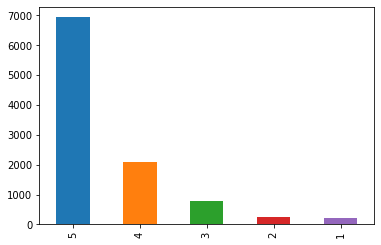

In [8]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
data['overall'].value_counts().plot.bar(color=colors)

In [9]:
data.isnull().sum()

reviewerID         0
asin               0
reviewerName      27
helpful            0
reviewText         7
overall            0
summary            0
unixReviewTime     0
reviewTime         0
dtype: int64

#Handling NaN values
Reviewer Name doesnot hold much importance for the ratings but review text does. So since only 7 are missing of review text , we can drop them. However lets replace the NaN with 'Missing'.

In [10]:
data['reviewText']=data['reviewText'].fillna('Missing')

#Merging both review text and summary

In [11]:
data['reviews']=data['reviewText']+data['summary']
data=data.drop(['reviewText','summary'],axis=1)

#Function to categorize ratings into Positive, Negative or Neutral

In [12]:
def func(data_frame):
    if(data_frame['overall']==3):
        val='Neutral'
    elif(data_frame['overall']<3):
        val='Negative'
    else:
        val='Positive'
    return val

In [13]:
data['sentiment']=data.apply(func,axis=1)

#Label Encoding the output

In [14]:
label_encoder=LabelEncoder()
data['sentiment']=label_encoder.fit_transform(data['sentiment'])

In [15]:
data['sentiment'].value_counts()

2    9022
1     772
0     467
Name: sentiment, dtype: int64

#Plotting the sentiment bar graph

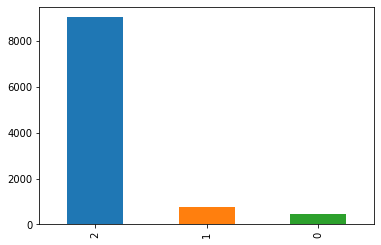

In [16]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
data['sentiment'].value_counts().plot.bar(color=colors)

#Downoading English stopwords

In [17]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

#Applying Stemming

In [18]:
ps=PorterStemmer()
corpus=[]
for i in range(len(data['reviews'])):
    review = re.sub('[^a-zA-Z]', ' ', data['reviews'][i])
    review = review.split()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]

    review = ' '.join(review)
    corpus.append(review)

#Applying Tfidf to convert the texts into vectors

In [19]:
tfid=TfidfVectorizer(max_features=5000,ngram_range=(2,2))
X= tfid.fit_transform(data['reviews'])
Y=data['sentiment']

#Applying SMOTE

In [20]:
smote=SMOTE(random_state=42)
X_final, Y_final = smote.fit_resample(X, Y)

#Train-Test split

In [21]:
X_train,X_test, y_train, y_test = train_test_split(X_final, Y_final, test_size=0.3, random_state=42)

In [22]:
logreg = LogisticRegression(random_state=0)
dec_tree=DecisionTreeClassifier()
knn=KNeighborsClassifier() #default n=5
svc=SVC()
mul_nb=MultinomialNB()
ran_for=RandomForestClassifier()
model_dict = {0: 'Logistic Regression', 1: 'Decision Tree',2:'KNN',3:'SVC',4:'Multinomial Naive Bayes',5:'Random Forest'}
models=[logreg,dec_tree,knn,svc,mul_nb,ran_for]


for i,model in enumerate(models):
    print("{} Test Accuracy: {}".format(model_dict[i],cross_val_score(model, X_final, Y_final, cv=5, scoring ='accuracy').mean()))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Logistic Regression Test Accuracy: 0.9542600278673481
Decision Tree Test Accuracy: 0.8932253421844045
KNN Test Accuracy: 0.9981157840061459
SVC Test Accuracy: 0.9926484633751567
Multinomial Naive Bayes Test Accuracy: 0.9051210363809
Random Forest Test Accuracy: 0.9811950065348434


In [23]:
logreg=LogisticRegression(solver='lbfgs')
knn=KNeighborsClassifier()
svc=SVC() #Took much time because of lots of features
mul_nb=MultinomialNB()
dec_tree=DecisionTreeClassifier()
ran_for=RandomForestClassifier()

#Function to plot Confusion Matrix

In [24]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
       
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i in range (cm.shape[0]):
        for j in range (cm.shape[1]):
            plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

#Training and Hyperparameter tuning for logistic regression

In [25]:
logreg.fit(X_train,y_train)
print("Train Accuracy for" ,"Logistic Regression", ":",logreg.score(X_train,y_train))
print("Test Accuracy for", "Logistic Regression", ":",logreg.score(X_test,y_test))

Train Accuracy for Logistic Regression : 0.9793623983954397
Test Accuracy for Logistic Regression : 0.9550492610837439


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [26]:
param_grid = {'C': np.logspace(-4, 4, 50),
             'penalty':['l1', 'l2']}
clf = GridSearchCV(LogisticRegression(random_state=0),solver='lbfgs', param_grid,cv=5, verbose=0,n_jobs=-1)
best_model = clf.fit(X_train,y_train)
print(best_model.best_estimator_)
print("The mean accuracy of the model is:",best_model.score(X_test,y_test))

LogisticRegression(C=6866.488450042998, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
The mean accuracy of the model is: 0.9717980295566503


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [27]:
logreg = LogisticRegression(C=6866.48845, random_state=0,solver='lbfgs',max_iter=50,penalty='l2')
logreg.fit(X_train, y_train)
y_pred1 = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(logreg.score(X_train, y_train)))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on train set: 1.00
Accuracy of logistic regression classifier on test set: 0.98


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


#Plotting Confusion matrix

Confusion matrix, without normalization


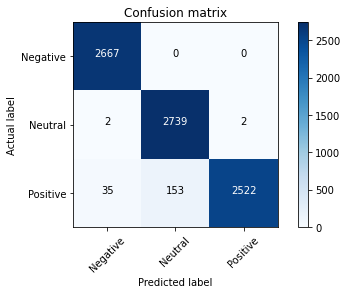

In [28]:
cm = confusion_matrix(y_test, y_pred1)
plot_confusion_matrix(cm, classes=['Negative','Neutral','Positive'])

In [ ]:
report1=classification_report(y_test,y_pred1)
print(report1)

#Training and Hyperparameter tuning for knn

In [29]:
knn.fit(X_train,y_train)
y_pred2 = knn.predict(X_test)
print("Train Accuracy for" ,"KNeighborsClassifier", ":",knn.score(X_train,y_train))
print("Test Accuracy for", "KNeighborsClassifier", ":",knn.score(X_test,y_test))

Train Accuracy for KNeighborsClassifier : 0.9982054259474296
Test Accuracy for KNeighborsClassifier : 0.9969211822660099


Confusion matrix, without normalization


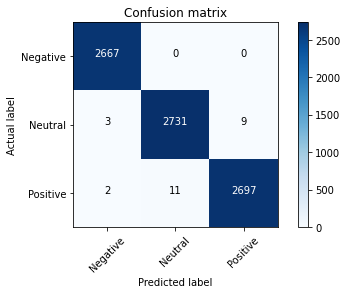

In [30]:
cm = confusion_matrix(y_test, y_pred2)
plot_confusion_matrix(cm, classes=['Negative','Neutral','Positive'])

In [31]:
report2=classification_report(y_test,y_pred2)
print(report2)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2667
           1       1.00      1.00      1.00      2743
           2       1.00      1.00      1.00      2710

    accuracy                           1.00      8120
   macro avg       1.00      1.00      1.00      8120
weighted avg       1.00      1.00      1.00      8120



#Training with Support Vector Classifier

In [32]:
svc.fit(X_train,y_train)
print("Train Accuracy for" ,"SVC", ":",svc.score(X_train,y_train))
print("Test Accuracy for", "SVC", ":",svc.score(X_test,y_test))

Train Accuracy for SVC : 0.9987332418452444
Test Accuracy for SVC : 0.9932266009852216


Confusion matrix, without normalization


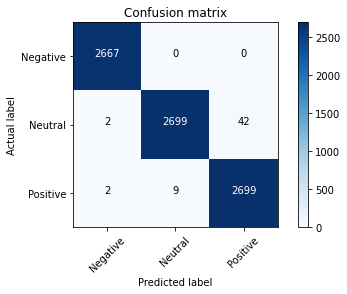

In [33]:
y_pred3 = svc.predict(X_test)
cm = confusion_matrix(y_test, y_pred3)
plot_confusion_matrix(cm, classes=['Negative','Neutral','Positive'])

In [34]:
report3=classification_report(y_test,y_pred3)
print(report3)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2667
           1       1.00      0.98      0.99      2743
           2       0.98      1.00      0.99      2710

    accuracy                           0.99      8120
   macro avg       0.99      0.99      0.99      8120
weighted avg       0.99      0.99      0.99      8120



#Training and hyperparameter training using Naive Bayes

In [35]:
mul_nb.fit(X_train,y_train)
print("Train Accuracy for" ,"MultinomialNB", ":",mul_nb.score(X_train,y_train))
print("Test Accuracy for", "MultinomialNB", ":",mul_nb.score(X_test,y_test))

Train Accuracy for MultinomialNB : 0.9304338646680038
Test Accuracy for MultinomialNB : 0.9110837438423646


In [37]:
param_grid = {'alpha': [1, 1e-1, 1e-2]
}
clf = GridSearchCV(MultinomialNB (), param_grid,cv=5, verbose=0,n_jobs=-1)
best_model = clf.fit(X_train,y_train)
print(best_model.best_estimator_)
print("The mean accuracy of the model is:",best_model.score(X_test,y_test))

MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)
The mean accuracy of the model is: 0.93435960591133


In [38]:
mulnb=MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)
mulnb.fit(X_train,y_train)
print("Train Accuracy for" ,"MultinomialNB", ":",mulnb.score(X_train,y_train))
print("Test Accuracy for", "MultinomialNB", ":",mulnb.score(X_test,y_test))

Train Accuracy for MultinomialNB : 0.9486962947323974
Test Accuracy for MultinomialNB : 0.93435960591133


Confusion matrix, without normalization


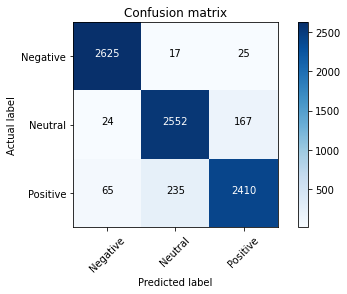

In [39]:
y_pred4 = mulnb.predict(X_test)
cm = confusion_matrix(y_test, y_pred4)
plot_confusion_matrix(cm, classes=['Negative','Neutral','Positive'])

In [40]:
report4=classification_report(y_test,y_pred4)
print(report4)

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      2667
           1       0.91      0.93      0.92      2743
           2       0.93      0.89      0.91      2710

    accuracy                           0.93      8120
   macro avg       0.93      0.93      0.93      8120
weighted avg       0.93      0.93      0.93      8120



#Training with Decision Tree

In [41]:
dec_tree.fit(X_train,y_train)
print("Train Accuracy for" ,"DecisionTreeClassifier", ":",dec_tree.score(X_train,y_train))
print("Test Accuracy for", "DecisionTreeClassifier", ":",dec_tree.score(X_test,y_test))

Train Accuracy for DecisionTreeClassifier : 1.0
Test Accuracy for DecisionTreeClassifier : 0.8815270935960591


Confusion matrix, without normalization


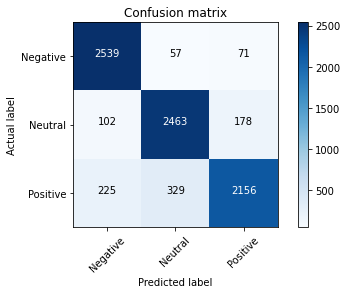

In [42]:
y_pred5 = dec_tree.predict(X_test)
cm = confusion_matrix(y_test, y_pred5)
plot_confusion_matrix(cm, classes=['Negative','Neutral','Positive'])

In [43]:
report5=classification_report(y_test,y_pred5)
print(report5)

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      2667
           1       0.86      0.90      0.88      2743
           2       0.90      0.80      0.84      2710

    accuracy                           0.88      8120
   macro avg       0.88      0.88      0.88      8120
weighted avg       0.88      0.88      0.88      8120



#Clearly we got overfitting with Decision Tree
This might be due oversampling. So let's try ensembling technique.

#Training with Random Forest Classifier

In [44]:
ran_for.fit(X_train,y_train)
print("Train Accuracy for" ,"RandomForestClassifier", ":",ran_for.score(X_train,y_train))
print("Test Accuracy for", "RandomForestClassifier", ":",ran_for.score(X_test,y_test))

Train Accuracy for RandomForestClassifier : 1.0
Test Accuracy for RandomForestClassifier : 0.979064039408867


Confusion matrix, without normalization


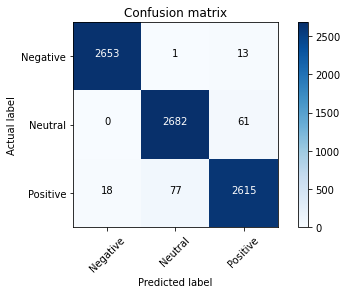

In [45]:
y_pred6 = ran_for.predict(X_test)
cm = confusion_matrix(y_test, y_pred6)
plot_confusion_matrix(cm, classes=['Negative','Neutral','Positive'])

In [46]:
report6=classification_report(y_test,y_pred6)
print(report6)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2667
           1       0.97      0.98      0.97      2743
           2       0.97      0.96      0.97      2710

    accuracy                           0.98      8120
   macro avg       0.98      0.98      0.98      8120
weighted avg       0.98      0.98      0.98      8120

